# 2.アヤメの分類


Week3で使用したirisデータセットを使い、分類問題を解く練習をします。

irisデータセットはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータでした。

Iris setosa - Wikipedia
Iris virgicolor - Wikipedia
Iris virginica - Wikipedia

4種類の特徴量（説明変数）からアヤメの種類を推測する問題が設定できます。アヤメの種類を 分類 するので、こういったものを分類問題と呼びます。

今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

最近傍法
ロジスティック回帰
SVM
決定木
ランダムフォレスト

## 3.分類問題の流れ


まず、最近傍法を例に分類問題を解く基本的な流れを紹介します。課題の後半ではこれを参考に他の手法にも適用してもらいます。

この流れについては後々より深く学び、実践していきます。今回の課題では大まかな流れの把握を行ってください。

練習のための準備
練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。こうすることで2次元の散布図を描き確認することができます。また、問題を単純化するためアヤメの種類を2つだけ使うことにします。分類対象が2種類の場合を 2値分類 と呼び、それ以上の 多値分類 とは区別をします。それぞれで手法や評価方法が変わります。今回はまずより基本的な2値分類を行います。

#### 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

virgicolorとvirginica
sepal_lengthとpetal_length

《実際の問題では？》

実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

In [557]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [558]:
iris = load_iris()
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [559]:
iris_name = iris['target_names']
iris_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [560]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [561]:
X = pd.DataFrame(iris.data, columns=['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [562]:
y = pd.DataFrame(iris.target, columns=['Species'])
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [563]:
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [592]:
df_iris = pd.concat([X,y],1)
df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [565]:
df = df_iris.drop(columns=['sepal width (cm)','petal width (cm)'])
df_w4 = df[df['Species']>0]
df_w4.head()

,sepal length (cm),petal length (cm),Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


#### 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

《実際の問題では？》

このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。

今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。

前処理
データに加工をしていきます。

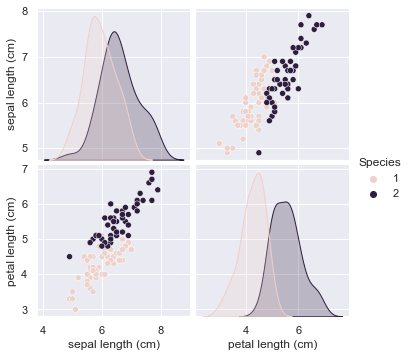

In [566]:
sns.pairplot(df_w4, hue='Species')

<AxesSubplot:xlabel='Species', ylabel='petal length (cm)'>

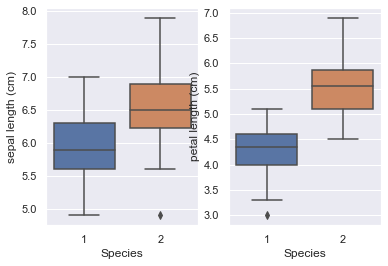

In [567]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(df_w4['Species'],df_w4.iloc[:,0],ax=ax1)
sns.boxplot(df_w4['Species'],df_w4.iloc[:,1],ax=ax2)

<AxesSubplot:xlabel='Species', ylabel='petal length (cm)'>

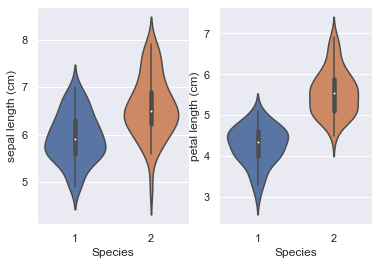

In [568]:
fig,(ax3,ax4) = plt.subplots(1,2)
sns.violinplot(df_w4['Species'],df_w4.iloc[:,0],ax=ax3)
sns.violinplot(df_w4['Species'],df_w4.iloc[:,1],ax=ax4)

#### 【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

《注意点》

データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。

《分割する理由》

分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [551]:
X_train,X_test,y_train,y_test = train_test_split(df_w4.iloc[:,0:2].values,df_w4.iloc[:,2].values,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(type(X_train))
print(X_train.dtype)

(75, 2) (75,)
(25, 2) (25,)
<class 'numpy.ndarray'>
float64


#### 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

《注意点》

標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。また、今回は分類問題なので、ラベルについては標準化させる必要はありません。

《実際の問題での前処理は？》

アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。


In [359]:
sc = StandardScaler()
sc.fit(X_train)
print(len(X_train))
print(len(y_train))


75
75


(array([[ 0.,  0.,  0.,  1.,  4., 20., 24., 15.,  6.,  5.],
        [ 1.,  7., 15., 17., 15., 11.,  6.,  3.,  0.,  0.]]),
 array([3.  , 3.49, 3.98, 4.47, 4.96, 5.45, 5.94, 6.43, 6.92, 7.41, 7.9 ]),
 <a list of 2 BarContainer objects>)

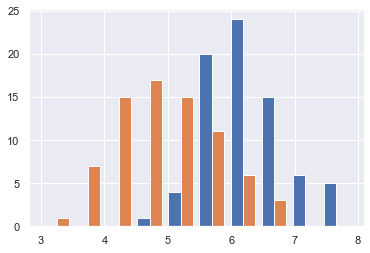

In [360]:
fig,ax = plt.subplots()
ax.hist(X_train)


(array([[ 0.,  0.,  0.,  2.,  5., 26., 32., 22.,  7.,  6.],
        [ 3.,  8., 18., 25., 18., 17.,  7.,  4.,  0.,  0.]]),
 array([3.  , 3.49, 3.98, 4.47, 4.96, 5.45, 5.94, 6.43, 6.92, 7.41, 7.9 ]),
 <a list of 2 BarContainer objects>)

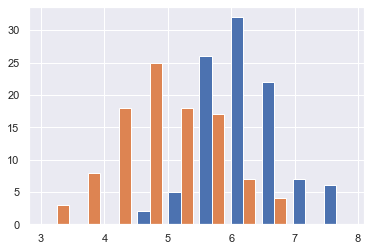

In [361]:
fig,ax = plt.subplots()
ax.hist(df_w4.iloc[:,0:2])

In [536]:
X_train_std = sc.transform(X_train)
X_train_lr = sc.transform(X_train)
X_train_sv = sc.transform(X_train)
X_train_tr = sc.transform(X_train)
X_train_ra = sc.transform(X_train)

In [537]:
X_test_std = sc.transform(X_test)
X_test_lr = sc.transform(X_test)
X_test_sv = sc.transform(X_test)
X_test_tr = sc.transform(X_test)
X_test_ra = sc.transform(X_test)

#### 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation

学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [364]:
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh1.fit(X_train_std,y_train)
y_1 = neigh1.predict(X_test_std)
print(y_1)
neigh3.fit(X_train_std,y_train)
y_3 = neigh3.predict(X_test_std)
print(y_3)
neigh5.fit(X_train_std,y_train)
y_5 = neigh5.predict(X_test_std)
print(y_5)

[1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
[1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 1 1 2 1 2 1]


#### 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。

scikit-learnを使い4種類の指標を計算する
混同行列をscikit-learnを使い表示する
4種類の指標値の意味について簡単に調査して文章でまとめる

[sklearn.metrics.accuracy_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[sklearn.metrics.precision_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

[sklearn.metrics.recall_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

[sklearn.metrics.f1_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

[sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)


In [531]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [532]:
len(y_train)

75

In [547]:

kn_ac = accuracy_score(y_test,y_5)
print("{:.5f}".format(kn_ac))

kn_re = recall_score(y_test,y_5)
print("{:.5f}".format(kn_re))

kn_pr = precision_score(y_test,y_5)
print("{:.5f}".format(kn_pr))

kn_f1 = f1_score(y_test,y_5)
print("{:.5f}".format(kn_f1))



0.88000
0.76923
1.00000
0.86957


In [368]:
confusion_matrix(y_test,y_1)

array([[10,  3],
       [ 1, 11]])

混合行列(Confusion Matrix)とTP, FP, FN, TN  
1文字目：T(True)は予測正解、F(False)は予測不正解。
2文字目：Pは予測が正(Positive)、Nは予測が負(Negative)  
TP、FP、FN、TNのマトリックスを混合行列(Confusion Matrix)と呼びます。下の混合行列で太字部分(TPとTN)は正解です。太字でないFPとFNは不正解で、False Positiveが統計で言う「第1種の誤り」で、False Negativeが「第2種の誤り」で、それぞれ偽陽性と偽陰性と呼ばれることもあります。  

![混合行列](https://aidemyexcontentspic.blob.core.windows.net/contents-pic/2010_ml_introduction/img_3_10.png)


•正解率  
全予測に対する正答率。  
```math
Accuracy=TP+TN/TP+FP+FN+TN 
```
•適合率  
正と予測したデータのうち，実際に正であるものの割合。  
```math
Presision=TPTP+FPPresision=TP/TP+FP
```
•再現率  
正であるものをどれだけ回収(予測)できたかの割合.  
```math
Recall=TP/TP+FN
```
•F値  
適合率と再現率の調和平均  
調和平均は同じ課題を異なる効率でこなす場合の平均効率であり，適合率も再現率も適合文書を得るための効率　　
```math
F値=2×適合率+再現率/適合率×再現率
```
[参考URL](https://qiita.com/FukuharaYohei/items/be89a99c53586fa4e2e4)

#### 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [369]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

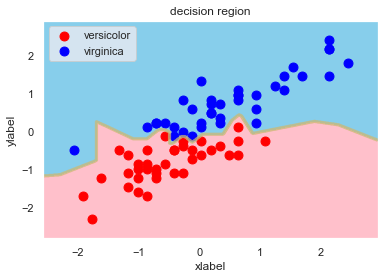

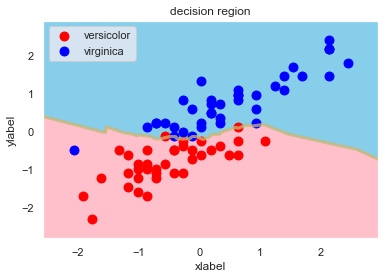

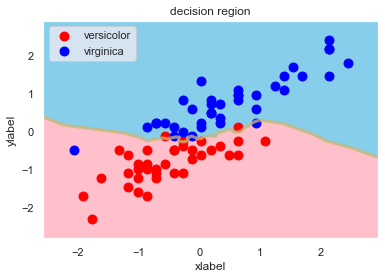

In [370]:
decision_region(X_train_std,y_train,neigh1)
decision_region(X_train_std,y_train,neigh3)
decision_region(X_train_std,y_train,neigh5)

3-nnの決定領域を表示した例が以下です。

![混合行列](https://t.gyazo.com/teams/diveintocode/a40d4c5f7ec594f5c7ee9e1b58fab96b.png)

この例では訓練データをプロットし、どのように学習したかを見ています。一方で、検証データをプロットすればどういった特徴量のものが間違って分類されたかを見ることができます。

手法の改善
実際の問題では指標値や可視化を元に手法を改善していきますが、この課題では扱いません。

## 4.各手法の比較


他の手法も基本的な流れは同様です。他の手法でも学習から可視化までを行っていきます。

#### 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

最近傍法
ロジスティック回帰
SVM
決定木
ランダムフォレスト

公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation
sklearn.linear_model.LogisticRegression — scikit-learn 0.21.3 documentation
sklearn.svm.SVC — scikit-learn 0.21.3 documentation
sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation
sklearn.ensemble.RandomForestClassifier — scikit-learn 0.21.3 documentation

《実際の問題では？》

ハイパーパラメータの調整は パラメータチューニング と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。


ロジスティック回帰
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
0.92000
0.84615
1.00000
0.91667
[[11  2]
 [ 0 12]]


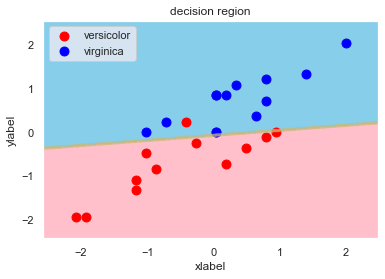

In [542]:
print("ロジスティック回帰")
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_lr,y_train)
y_lr = lr.predict(X_test_lr)
print(y_lr)

lr_ac = accuracy_score(y_test,y_lr)
print("{:.5f}".format(lr_ac))

lr_re = recall_score(y_test,y_lr)
print("{:.5f}".format(lr_re))

lr_pr = precision_score(y_test,y_lr)
print("{:.5f}".format(lr_pr))

lr_f1 = f1_score(y_test,y_lr)
print("{:.5f}".format(lr_f1))


confusion_matrix(y_test,y_lr)
print(confusion_matrix(y_test,y_lr))
decision_region(X_test_lr,y_test,lr)

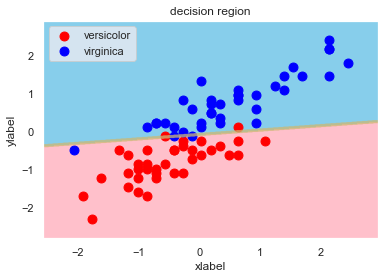

In [528]:
decision_region(X_train_lr,y_train,lr)

SVM
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
0.92000
0.84615
1.00000
0.91667
[[11  2]
 [ 0 12]]


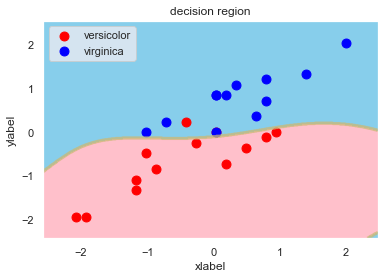

In [552]:
print("SVM")
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svm = make_pipeline(StandardScaler(), SVC())
svm.fit(X_train_sv,y_train)
y_sv = svm.predict(X_test_sv)
print(y_sv)

sv_ac = accuracy_score(y_test,y_sv)
print("{:.5f}".format(sv_ac))

sv_re = recall_score(y_test,y_sv)
print("{:.5f}".format(sv_re))

sv_pr = precision_score(y_test,y_sv)
print("{:.5f}".format(sv_pr))

sv_f1 = f1_score(y_test,y_sv)
print("{:.5f}".format(sv_f1))


print(confusion_matrix(y_test,y_sv))
decision_region(X_test_sv,y_test,svm)

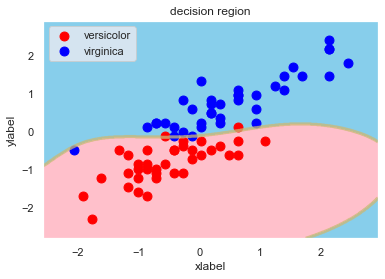

In [519]:
decision_region(X_train_sv,y_train,svm)

決定木
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 2 1 2 1]
0.88000
0.76923
1.00000
0.86957
[[10  3]
 [ 0 12]]


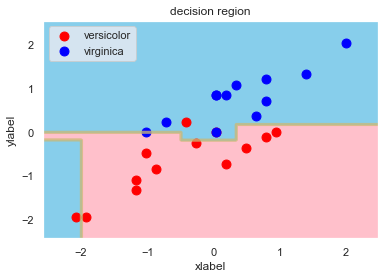

In [544]:
print("決定木")
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier()
tr.fit(X_train_tr,y_train.ravel())
y_tr = tr.predict(X_test_tr)
print(y_tr)

tr_ac = accuracy_score(y_test,y_tr)
print("{:.5f}".format(tr_ac))

tr_re = recall_score(y_test,y_tr)
print("{:.5f}".format(tr_re))

tr_pr = precision_score(y_test,y_tr)
print("{:.5f}".format(tr_pr))

tr_f1 = f1_score(y_test,y_tr)
print("{:.5f}".format(tr_f1))


print(confusion_matrix(y_test,y_tr))
decision_region(X_test_tr,y_test,tr)

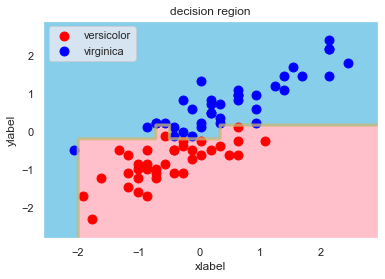

In [515]:
decision_region(X_train_tr,y_train,tr)

ランダムフォレスト
[1 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
0.88000
0.76923
1.00000
0.86957
[[10  3]
 [ 0 12]]


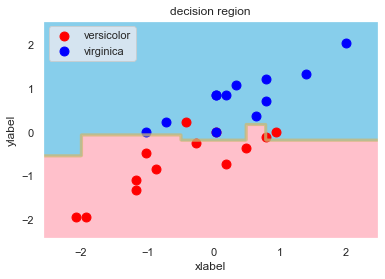

In [545]:
print("ランダムフォレスト")
from sklearn.ensemble import RandomForestClassifier

rd = RandomForestClassifier()
rd.fit(X_train_ra,y_train)
y_ra = rd.predict(X_test_ra)
print(y_ra)

ra_ac = accuracy_score(y_test,y_ra)
print("{:.5f}".format(ra_ac))

ra_re = recall_score(y_test,y_ra)
print("{:.5f}".format(ra_re))

ra_pr = precision_score(y_test,y_ra)
print("{:.5f}".format(ra_pr))

ra_f1 = f1_score(y_test,y_ra)
print("{:.5f}".format(ra_f1))


print(confusion_matrix(y_test,y_ra))
decision_region(X_test_ra,y_test,rd)

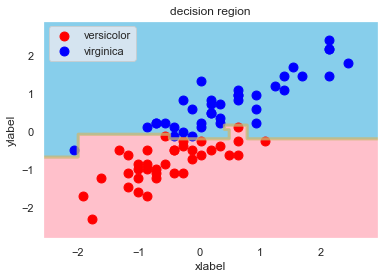

In [513]:
decision_region(X_train_ra,y_train,rd)

In [548]:
hyouka= pd.DataFrame([[kn_ac,kn_re,kn_pr,kn_f1],
                      [lr_ac,lr_re,lr_pr,lr_f1],
                      [sv_ac,sv_re,sv_pr,sv_f1],
                      [tr_ac,tr_re,tr_pr,tr_f1],
                      [ra_ac,ra_re,ra_pr,ra_f1]]
   , index=['knn','ロジスティック','SVM','決定木','random forest'], columns=['accuracy','recall','precision','f1'])
hyouka.head()

,accuracy,recall,precision,f1
knn,0.88,0.769231,1.0,0.869565
ロジスティック,0.92,0.846154,1.0,0.916667
SVM,0.92,0.846154,1.0,0.916667
決定木,0.88,0.769231,1.0,0.869565
random forest,0.88,0.769231,1.0,0.869565


評点が純粋に高いのはロジスティック回帰とSVMとなった。 　


決定域を見てみるとknnは波のような分け方で、ロジスティックは二分した図、SVMは丸みがある図、決定木とランダムフォレストは角ばった図になった。 　

#### 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

In [569]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(df_w4.iloc[:,0:2].values,df_w4.iloc[:,2].values,random_state=0)
X_train2,X_test2,y_train2,y_test2 = train_test_split(df_w4.iloc[:,0:2].values,df_w4.iloc[:,2].values,random_state=0)
X_train3,X_test3,y_train3,y_test3 = train_test_split(df_w4.iloc[:,0:2].values,df_w4.iloc[:,2].values,random_state=0)
X_train4,X_test4,y_train4,y_test4 = train_test_split(df_w4.iloc[:,0:2].values,df_w4.iloc[:,2].values,random_state=0)
X_train5,X_test5,y_train5,y_test5 = train_test_split(df_w4.iloc[:,0:2].values,df_w4.iloc[:,2].values,random_state=0)

[[11  2]
 [ 0 12]]


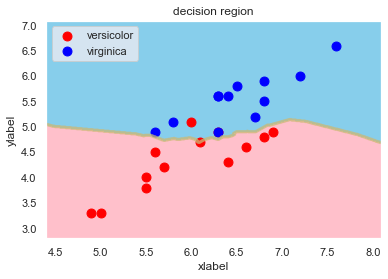

[[10  3]
 [ 0 12]]


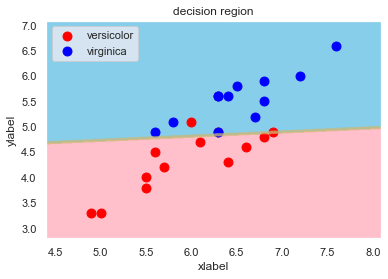

[[11  2]
 [ 0 12]]


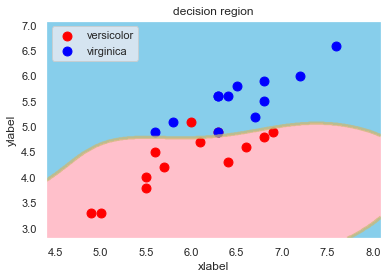

[[10  3]
 [ 0 12]]


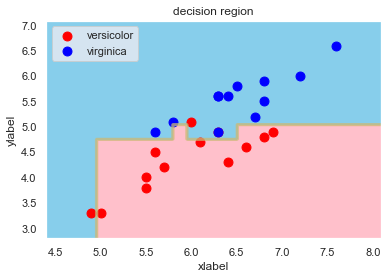

[[ 9  4]
 [ 0 12]]


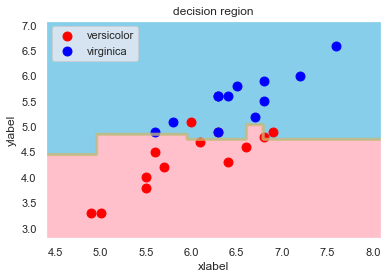

In [570]:
kn = KNeighborsClassifier()
kn.fit(X_train1,y_train1)
y_kn = kn.predict(X_test1)
ra_ac = accuracy_score(y_test1,y_kn)
ra_re = recall_score(y_test1,y_kn)
ra_pr = precision_score(y_test1,y_kn)
ra_f1 = f1_score(y_test1,y_kn)
print(confusion_matrix(y_test1,y_kn))
decision_region(X_test1,y_test1,kn)

lr = LogisticRegression()
lr.fit(X_train2,y_train2)
y_lr = lr.predict(X_test2)
ra_ac = accuracy_score(y_test2,y_lr)
ra_re = recall_score(y_test2,y_lr)
ra_pr = precision_score(y_test2,y_lr)
ra_f1 = f1_score(y_test2,y_lr)
print(confusion_matrix(y_test2,y_lr))
decision_region(X_test2,y_test2,lr)

svm = make_pipeline(StandardScaler(), SVC())
svm.fit(X_train3,y_train3)
y_sv = svm.predict(X_test3)
ra_ac = accuracy_score(y_test3,y_sv)
ra_re = recall_score(y_test3,y_sv)
ra_pr = precision_score(y_test3,y_sv)
ra_f1 = f1_score(y_test3,y_sv)
print(confusion_matrix(y_test3,y_sv))
decision_region(X_test3,y_test3,svm)

tr = DecisionTreeClassifier()
tr.fit(X_train4,y_train4)
y_tr = tr.predict(X_test4)
ra_ac = accuracy_score(y_test4,y_tr)
ra_re = recall_score(y_test4,y_tr)
ra_pr = precision_score(y_test4,y_tr)
ra_f1 = f1_score(y_test4,y_tr)
print(confusion_matrix(y_test4,y_tr))
decision_region(X_test4,y_test4,tr)

rd = RandomForestClassifier()
rd.fit(X_train5,y_train5)
y_ra = rd.predict(X_test5)
ra_ac = accuracy_score(y_test5,y_ra)
ra_re = recall_score(y_test5,y_ra)
ra_pr = precision_score(y_test5,y_ra)
ra_f1 = f1_score(y_test5,y_ra)
print(confusion_matrix(y_test5,y_ra))
decision_region(X_test5,y_test5,rd)

In [571]:
hyouka2= pd.DataFrame([[kn_ac,kn_re,kn_pr,kn_f1],
                      [lr_ac,lr_re,lr_pr,lr_f1],
                      [sv_ac,sv_re,sv_pr,sv_f1],
                      [tr_ac,tr_re,tr_pr,tr_f1],
                      [ra_ac,ra_re,ra_pr,ra_f1]]
   , index=['knn','ロジスティック','SVM','決定木','random forest'], columns=['accuracy','recall','precision','f1'])
hyouka2.head()

,accuracy,recall,precision,f1
knn,0.88,0.769231,1.0,0.869565
ロジスティック,0.92,0.846154,1.0,0.916667
SVM,0.92,0.846154,1.0,0.916667
決定木,0.88,0.769231,1.0,0.869565
random forest,0.84,0.692308,1.0,0.818182


標準化後の指標


accuracy	recall	   precision	f1
knn	            0.88	0.769231	1.0	  0.869565  
ロジスティック	    0.92	0.846154	1.0	 0.916667  
SVM	            0.92	0.846154	1.0	  0.916667  
決定木	          0.88	0.769231	 1.0	0.869565  
random forest	0.88	0.769231	1.0	  0.869565  


今回比べてみたところ　ランダムフォレストの値が悪くなっていた。 


決定域は標準化後に比べて滑らかな分割を行なっていることがわかる。 　

検証用データだと数が少ないのかデータに違いが出づらい。  

#### 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。

《多値になることでの変更点》

指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。

決定領域を可視化する前述の関数は適切に書き換える必要があります。以下が出力例です。

![混合行列](https://t.gyazo.com/teams/diveintocode/6ef74d6498e42db50c8aed515a305bcb.png)



ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要ですが、scikit-learnでは自動的に判断して処理が行われるため変更は必要ありません。

In [587]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region3(X, y, model,
                     step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel',
                     target_names=['setosa','versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green','red', 'blue']
    contourf_color = ['yellow','pink', 'skyblue']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i],
                    label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i])
               for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [618]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2]
macro
0.94737
0.94213
0.94213
0.94213
micro
0.94737
0.94737
0.94737
[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


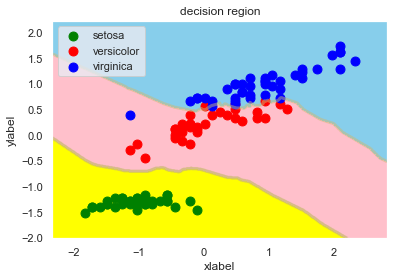

In [619]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(df_iris.iloc[:,[0,2]].values,df_iris.iloc[:,-1].values, random_state=0)

X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)
knn.fit(X_train3,y_train3.ravel())
y_kn = knn.predict(X_test3)
print(y_kn)
print("macro")

kn_ac=accuracy_score(y_test3,y_kn)
kn_re=recall_score(y_test3,y_kn, average='macro')
kn_pr=precision_score(y_test3,y_kn, average='macro')
kn_f1=f1_score(y_test3,y_kn, average='macro')
kn_ac1=accuracy_score(y_test3,y_kn)
kn_re1=recall_score(y_test3,y_kn, average='micro')
kn_pr1=precision_score(y_test3,y_kn, average='micro')
kn_f11=f1_score(y_test3,y_kn, average='micro')
print("{:.5f}".format(accuracy_score(y_test3,y_kn)))
print("{:.5f}".format(recall_score(y_test3,y_kn, average='macro')))
print("{:.5f}".format(precision_score(y_test3,y_kn, average='macro')))
print("{:.5f}".format(f1_score(y_test3,y_kn, average='macro')))
print("micro")
print("{:.5f}".format(recall_score(y_test3,y_kn, average='micro')))
print("{:.5f}".format(precision_score(y_test3,y_kn, average='micro')))
print("{:.5f}".format(f1_score(y_test3,y_kn, average='micro')))
print(confusion_matrix(y_test3,y_kn))
decision_region3(X_train3,y_train3,knn)

[2 1 0 2 0 2 0 1 2 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
macro
0.94737
0.95833
0.93939
0.94444
micro
0.94737
0.94737
0.94737
[[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]


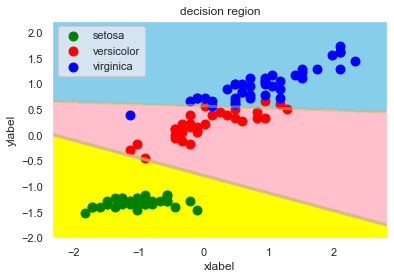

In [620]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(df_iris.iloc[:,[0,2]].values,df_iris.iloc[:,-1].values, random_state=0)

X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)
lr.fit(X_train3,y_train3.ravel())
y_lr = lr.predict(X_test3)
print(y_lr)
print("macro")

lr_ac=accuracy_score(y_test3,y_lr)
lr_re=recall_score(y_test3,y_lr, average='macro')
lr_pr=precision_score(y_test3,y_lr, average='macro')
lr_f1=f1_score(y_test3,y_lr, average='macro')
print("{:.5f}".format(accuracy_score(y_test3,y_lr)))
print("{:.5f}".format(recall_score(y_test3,y_lr, average='macro')))
print("{:.5f}".format(precision_score(y_test3,y_lr, average='macro')))
print("{:.5f}".format(f1_score(y_test3,y_lr, average='macro')))
print("micro")
lr_ac1=accuracy_score(y_test3,y_lr)
lr_re1=recall_score(y_test3,y_lr, average='micro')
lr_pr1=precision_score(y_test3,y_lr, average='micro')
lr_f11=f1_score(y_test3,y_lr, average='micro')
print("{:.5f}".format(recall_score(y_test3,y_lr, average='micro')))
print("{:.5f}".format(precision_score(y_test3,y_lr, average='micro')))
print("{:.5f}".format(f1_score(y_test3,y_lr, average='micro')))
print(confusion_matrix(y_test3,y_lr))
decision_region3(X_train3,y_train3,lr)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2]
macro
0.94737
0.94213
0.94213
0.94213
micro
0.94737
0.94737
0.94737
[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


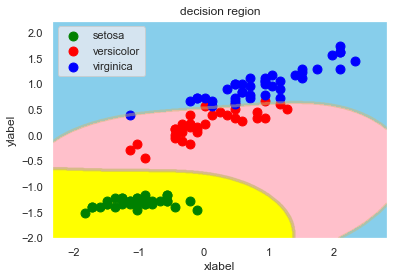

In [621]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(df_iris.iloc[:,[0,2]].values,df_iris.iloc[:,-1].values, random_state=0)

X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)
svm.fit(X_train3,y_train3.ravel())
y_sv = svm.predict(X_test3)
print(y_sv)
print("macro")

sv_ac=accuracy_score(y_test3,y_sv)
sv_re=recall_score(y_test3,y_sv, average='macro')
sv_pr=precision_score(y_test3,y_sv, average='macro')
sv_f1=f1_score(y_test3,y_sv, average='macro')
sv_ac1=accuracy_score(y_test3,y_sv)
sv_re1=recall_score(y_test3,y_sv, average='micro')
sv_pr1=precision_score(y_test3,y_sv, average='micro')
sv_f11=f1_score(y_test3,y_sv, average='micro')

print("{:.5f}".format(accuracy_score(y_test3,y_sv)))
print("{:.5f}".format(recall_score(y_test3,y_sv, average='macro')))
print("{:.5f}".format(precision_score(y_test3,y_sv, average='macro')))
print("{:.5f}".format(f1_score(y_test3,y_sv, average='macro')))
print("micro")
print("{:.5f}".format(recall_score(y_test3,y_sv, average='micro')))
print("{:.5f}".format(precision_score(y_test3,y_sv, average='micro')))
print("{:.5f}".format(f1_score(y_test3,y_sv, average='micro')))
print(confusion_matrix(y_test3,y_sv))
decision_region3(X_train3,y_train3,svm)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2]
macro
0.92105
0.90509
0.91912
0.91087
micro
0.92105
0.92105
0.92105
[[13  0  0]
 [ 0 15  1]
 [ 0  2  7]]


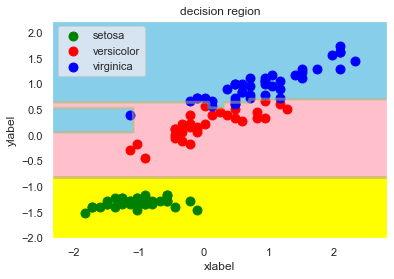

In [622]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(df_iris.iloc[:,[0,2]].values,df_iris.iloc[:,-1].values, random_state=0)

X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)
tr.fit(X_train3,y_train3.ravel())
y_tr = tr.predict(X_test3)
print(y_tr)
print("macro")
tr_ac=accuracy_score(y_test3,y_tr)
tr_re=recall_score(y_test3,y_tr, average='macro')
tr_pr=precision_score(y_test3,y_tr, average='macro')
tr_f1=f1_score(y_test3,y_tr, average='macro')
tr_ac1=accuracy_score(y_test3,y_tr)
tr_re1=recall_score(y_test3,y_tr, average='micro')
tr_pr1=precision_score(y_test3,y_tr, average='micro')
tr_f11=f1_score(y_test3,y_tr, average='micro')

print("{:.5f}".format(accuracy_score(y_test3,y_tr)))
print("{:.5f}".format(recall_score(y_test3,y_tr, average='macro')))
print("{:.5f}".format(precision_score(y_test3,y_tr, average='macro')))
print("{:.5f}".format(f1_score(y_test3,y_tr, average='macro')))
print("micro")
print("{:.5f}".format(recall_score(y_test3,y_tr, average='micro')))
print("{:.5f}".format(precision_score(y_test3,y_tr, average='micro')))
print("{:.5f}".format(f1_score(y_test3,y_tr, average='micro')))
print(confusion_matrix(y_test3,y_tr))
decision_region3(X_train3,y_train3,tr)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2]
macro
0.92105
0.90509
0.91912
0.91087
micro
0.92105
0.92105
0.92105
[[13  0  0]
 [ 0 15  1]
 [ 0  2  7]]


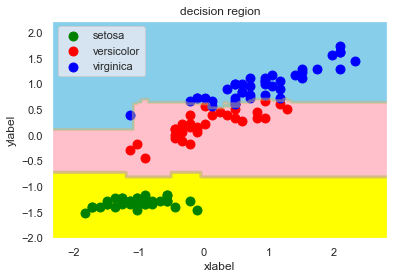

In [623]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(df_iris.iloc[:,[0,2]].values,df_iris.iloc[:,-1].values, random_state=0)

X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)
rd.fit(X_train3,y_train3.ravel())
y_ra = rd.predict(X_test3)
print(y_ra)
print("macro")

ra_ac=accuracy_score(y_test3,y_ra)
ra_re=recall_score(y_test3,y_ra, average='macro')
ra_pr=precision_score(y_test3,y_ra, average='macro')
ra_f1=f1_score(y_test3,y_ra, average='macro')
ra_ac1=accuracy_score(y_test3,y_ra)
ra_re1=recall_score(y_test3,y_ra, average='micro')
ra_pr1=precision_score(y_test3,y_ra, average='micro')
ra_f11=f1_score(y_test3,y_ra, average='micro')

print("{:.5f}".format(accuracy_score(y_test3,y_ra)))
print("{:.5f}".format(recall_score(y_test3,y_ra, average='macro')))
print("{:.5f}".format(precision_score(y_test3,y_ra, average='macro')))
print("{:.5f}".format(f1_score(y_test3,y_ra, average='macro')))
print("micro")
print("{:.5f}".format(recall_score(y_test3,y_ra, average='micro')))
print("{:.5f}".format(precision_score(y_test3,y_ra, average='micro')))
print("{:.5f}".format(f1_score(y_test3,y_ra, average='micro')))
print(confusion_matrix(y_test3,y_ra))
decision_region3(X_train3,y_train3,rd)

In [625]:
hyouka3= pd.DataFrame([[kn_ac,kn_re,kn_pr,kn_f1],
                      [lr_ac,lr_re,lr_pr,lr_f1],
                      [sv_ac,sv_re,sv_pr,sv_f1],
                      [tr_ac,tr_re,tr_pr,tr_f1],
                      [ra_ac,ra_re,ra_pr,ra_f1]]
   , index=['knn','ロジスティック','SVM','決定木','random forest'], columns=['accuracy','recall','precision','f1'])
hyouka3.head()

,accuracy,recall,precision,f1
knn,0.947368,0.942130,0.942130,0.942130
ロジスティック,0.947368,0.958333,0.939394,0.944444
SVM,0.947368,0.942130,0.942130,0.942130
決定木,0.921053,0.905093,0.919118,0.910873
random forest,0.921053,0.905093,0.919118,0.910873


In [626]:
hyouka4= pd.DataFrame([[kn_ac1,kn_re1,kn_pr1,kn_f11],
                      [lr_ac1,lr_re1,lr_pr1,lr_f11],
                      [sv_ac1,sv_re1,sv_pr1,sv_f11],
                      [tr_ac1,tr_re1,tr_pr1,tr_f11],
                      [ra_ac1,ra_re1,ra_pr1,ra_f11]]
   , index=['knn','ロジスティック','SVM','決定木','random forest'], columns=['accuracy','recall','precision','f1'])
hyouka4.head()

,accuracy,recall,precision,f1
knn,0.947368,0.947368,0.947368,0.947368
ロジスティック,0.947368,0.947368,0.947368,0.947368
SVM,0.947368,0.947368,0.947368,0.947368
決定木,0.921053,0.921053,0.921053,0.921053
random forest,0.921053,0.921053,0.921053,0.921053


In [628]:
hyouka5 = pd.concat([hyouka3,hyouka4])
hyouka5.head(10)

,accuracy,recall,precision,f1
knn,0.947368,0.942130,0.942130,0.942130
ロジスティック,0.947368,0.958333,0.939394,0.944444
SVM,0.947368,0.942130,0.942130,0.942130
決定木,0.921053,0.905093,0.919118,0.910873
random forest,0.921053,0.905093,0.919118,0.910873
knn,0.947368,0.947368,0.947368,0.947368
ロジスティック,0.947368,0.947368,0.947368,0.947368
SVM,0.947368,0.947368,0.947368,0.947368
決定木,0.921053,0.921053,0.921053,0.921053
random forest,0.921053,0.921053,0.921053,0.921053


In [635]:
hyouka3.idxmax()

accuracy         knn
recall       ロジスティック
precision        knn
f1           ロジスティック
dtype: object

In [636]:
hyouka4.idxmax()

accuracy     knn
recall       knn
precision    knn
f1           knn
dtype: object

In [634]:
hyouka5.idxmax()

accuracy         knn
recall       ロジスティック
precision        knn
f1               knn
dtype: object

上記の結果から最近傍法が最も高い結果となった。 　